# Tarea 1 INF 395

Para las tareas se utilizará `Keras`, una libreria de Deep Learning de alto nivel para Python, con el reciente anuncio de Keras Core, uno puede escoger el backend de su preferencia, ya sea Pytorch, Tensorflow o JAX.

Para más Información pueden revisar la documentación oficial de Keras: https://keras.io/

In [ ]:
#Para utilizar keras-core primero hay que instalar tensorflow o pytorch o jax
#pip install tensorflow

# una vez instalado nuestro backend podemos instalar keras-core
#Se recomienda correr el jupyter notebook en colab, ya que tiene acceso gratis a GPUS y también tiene ya instalado tensorflow, pytorch y jax, solo hace falta instalar keras-core.
!pip install -q keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 6.9 MB/s eta 0:00:00


## Integrantes:

* Nombre: Christopher Silva
* Nombre: Sebastian Salazar
* Nombre: Juan Suárez

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns

# Aquí se escoge el backend de keras
os.environ["KERAS_BACKEND"] = "tensorflow" # 'torch', 'tensorflow', 'jax'

import keras_core as keras

SEED = 42
keras.utils.set_random_seed(SEED)

import io

Using TensorFlow backend


## Helper Functions

In [ ]:
def viz_imgs(imgs, labels):
  "Función para visualizar imágenes junto a sus labels"
  plt.figure(figsize=(10,10))
  random_inds = np.random.choice(imgs.shape[0],36)
  for i in range(36):
      plt.subplot(6,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      image_ind = random_inds[i]
      plt.imshow(np.squeeze(imgs[image_ind]), cmap=plt.cm.binary)
      plt.xlabel(labels[image_ind])

In [ ]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def plot_losses_v2(history, loss):
  "Función para graficar la función de pérdida del modelo [modificada]"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel("loss")
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def plot_cm(y_pred, y_test):
  "Función para graficar matriz de confusión"
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  cm_display = ConfusionMatrixDisplay(cm).plot()

## Parte 1: Demostración del uso de Keras

### 1.1 Mnist

Mnist es un dataset de imágenes de dígitos escritos a mano. Cada imagen es de 28x28 pixeles y está en escala de grises. El dataset está dividido en 60.000 imágenes de entrenamiento y 10.000 imágenes de testeo.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Exploración de los Datos

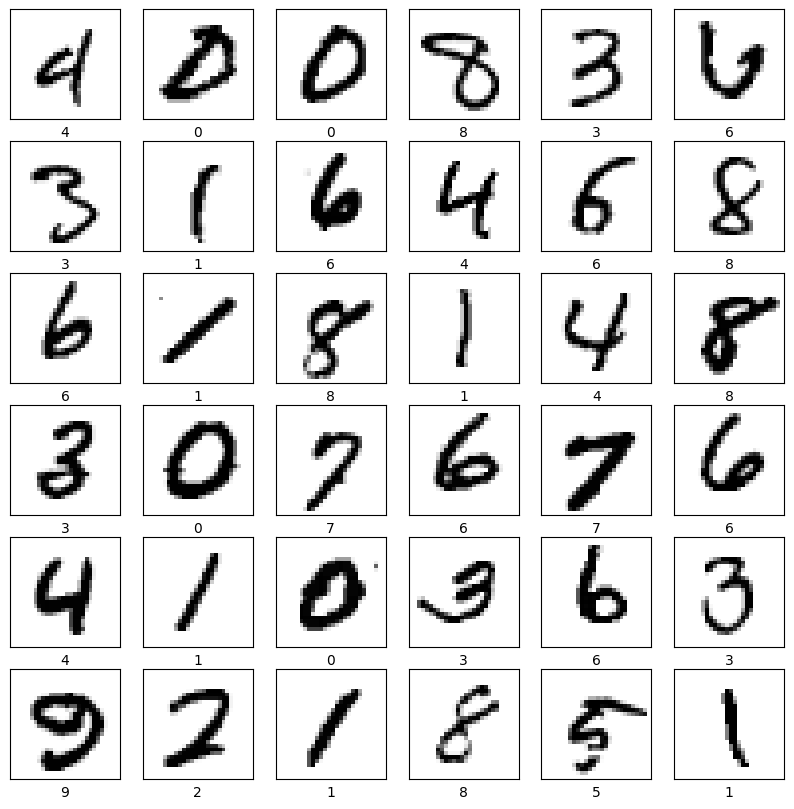

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de clases:', num_classes)
print('Dimension de los datos:', input_shape)

cantidad de clases: 10
Dimension de los datos: (28, 28)


#### One Hot Encoding

In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [5 0 4 ... 5 6 8]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Arquitectura de la red

In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
# print(inputs)
x = keras.layers.Flatten()(inputs)
# print(x)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 784)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

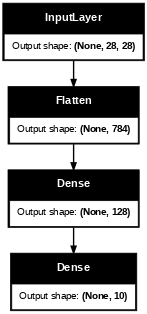

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

#### Definición de hiperparámetros

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128        #cantidad de imágenes por batch
epochs = 20             #cantidad de epochs
validation_split = 0.2  #Porcentaje de data destinada a validación

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

#### Entrenamiento del Modelo

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6077 - loss: 17.2967 - val_accuracy: 0.7898 - val_loss: 1.0557
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7962 - loss: 0.9616 - val_accuracy: 0.8378 - val_loss: 0.7853
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8409 - loss: 0.6901 - val_accuracy: 0.8591 - val_loss: 0.6569
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8647 - loss: 0.5500 - val_accuracy: 0.8724 - val_loss: 0.5855
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8799 - loss: 0.4683 - val_accuracy: 0.8839 - val_loss: 0.5360
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8914 - loss: 0.4117 - val_accuracy: 0.8911 - val_loss: 0.5022
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9014 - loss: 0.3691 - val_accuracy: 0.8976 - val_loss: 0.4756
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9085 - loss: 0.3359 - val_accuracy

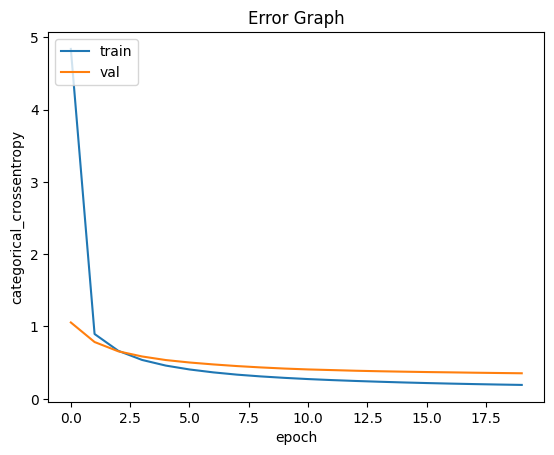

In [ ]:
plot_losses(history, loss)

#### Evaluación del Modelo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - 2ms/step - accuracy: 0.9214 - loss: 0.3680
Test loss: 0.36804887652397156
Test accuracy: 0.9214000105857849


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


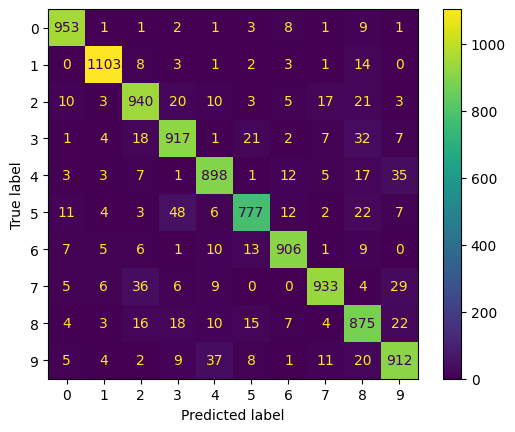

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

### 1.2.1 Cifar10

Cifar10 es un dataset de imágenes de 32x32 pixeles, que contiene 10 clases distintas. Este dataset es muy utilizado para probar algoritmos de clasificación de imágenes. En este caso, utilizaremos una versión reducida de este dataset, que contiene 50000 imágenes de entrenamiento y 10000 imágenes de testeo, con 100 imágenes por clase. Las clases son: 'avión', 'automóvil', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco' y 'camión'.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [ ]:
#Visualizamos si el dataset es balanceado o no.
pd.value_counts(pd.Series(y_train.reshape(-1)))

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


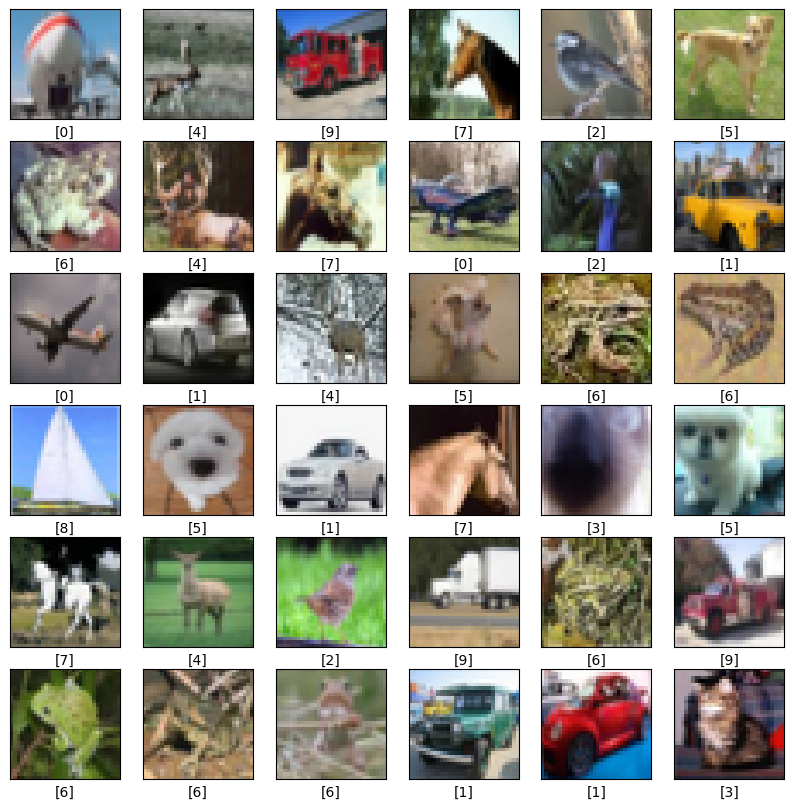

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de imágenes:',x_train.shape[0])
print('Dimensión de los datos:',input_shape)
print('Tipo de Datos:',x_train.dtype)
print('cantidad de clases:', num_classes)

cantidad de imágenes: 50000
Dimensión de los datos: (32, 32, 3)
Tipo de Datos: uint8
cantidad de clases: 10


In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# print("holo")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 128)               │    393,344 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

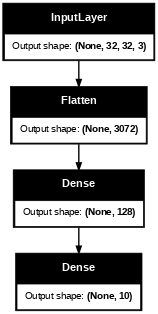

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128
epochs = 20
validation_split = 0.2

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
# Comparamos otras métricas de clasificación como la precisión, recall y f1-score
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Podemos observar como este simple modelo de redes neuronales no es lo suficientemente capaz de clasificar las imágenes, de hecho les asigna el mismo label a todas las imágenes.

Es por esto que saltan los warnings, porque al calcular f1, recall y precisión, no hay datos para las otras clases.

Ahora vamos a ver como podemos mejorar nuestro modelo.

### 1.2.2 Mejorando el Modelo

In [ ]:
#Es una práctica común en modelos de machine learning escalar nuestros datos, asi nos aseguramos de que todos tengan el mismo rango, con pequeños cambios como estos nuestros modelos pueden mejorar su desempeño.

#Escalamos las imágenes entre [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()



**Explique cómo funciona la capa de Dropout dentro del modelo y por qué esta capa mejora las predicciones [3pts]**

Respuesta: En la fase de entrenamiento se selecciona aleatoriamente una cierta parte (porcentaje) de neuronas de la capa anterior a ella, con lo cual sus salidas se hacen temporalmente nulas. Simula la eliminación temporal de una parte de la red neuronal durante el proceso de entrenamiento. Luego, en la fase de inferencia o predicción, todas las neuronas están activas.

Mejora las predicciones porque evita el overfitting, mejora la generalización de la red (robustez) y la regularización (evita que la red se vuelva demasiado sensible a pequeñas variaciones en los datos).

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Agregamos Callbacks
#Early Stopping monitorea la función de pérdida y detiene el entrenamiento cuando no hay mejora dentro de un número de épocas determinado, lo que nos ahorra tiempo de entrenamiento y también evita el sobreajuste.
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
#Cambiamos el Optimizador a Adam
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.Adam(learning_rate=1e-3) # 0.0001
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
# agregamos más epoochs ahora que tenemos early stopping
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Aún estamos con un accuracy del 0.5, eso seria equivalente a lanzar una moneda al aire y que salga cara o sello, por lo que no es un buen modelo, pero se puede mejorar.

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

### 1.2.3 Último Modelo ahora Con Convoluciones y Skip Connections

Keras nos permite complejizar el modelo de una manera muy sencilla, agregaremos capas convolucionales, ya que estas son muy buenas a la hora de trabajar con imágenes, también agregaremos skip connections que son conexiones que se saltan capas del modelo.

**EJEMPLO DE SKIP CONNECTION**

<img src="https://theaisummer.com/static/8d19d048cd68d6dce362e025cf3b635a/1ac66/skip-connection.png">

**¿Qué problema resuelven las Skip Connections y como lo hacen? [3pts]**

Respuesta: Las skip connections consisten en una conexión directa entre dos neuronas de tal manera que se salten una o más capas entre ambas, esto implica que el input de la segunda de estas no sea el output de la neurona anterior, si no que, de alguna manera, se pasa directamente la información de la primera de ellas.

Estas pueden evitar que el gradiente explote o tienda a desaparecer durante la fase de entrenamiento, pues se proporcionan caminos más cortos para este. Además, son útiles para evitar pérdida de información relevante a medida que se procesan los datos a través de las múltiples capas, pues se les permite a las más profundas acceder directamente a las características de las más tempranas.





In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_1)
x_1 = keras.layers.Dropout(0.2)(x_1)
flatten_x1 = keras.layers.Flatten()(x_1)

x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_2)
x_2 = keras.layers.Dropout(0.2)(x_2)
flatten_x2 = keras.layers.Flatten()(x_2)

x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_3)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_3)
x_3 = keras.layers.Dropout(0.2)(x_3)
flatten_x3 = keras.layers.Flatten()(x_3)

z = keras.layers.concatenate([flatten_x1, flatten_x2])
z = keras.layers.concatenate([z, flatten_x3])

z =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(z)
outputs = keras.layers.Dense(num_classes, activation='softmax')(z)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador a AdamW
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics, jit_compile=True)

In [ ]:
#Early Stopping
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
# Hiperparámetros
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Ahora ya tenemos resultados aceptables, pero esta no es la única forma de mejorar nuestro modelo, si ya conocemos alguna arquitectura del estado del arte para nuestra tarea podemos simplemente importar un modelo, congelarlo y reemplazar la última capa para que se ajuste a nuestro problema. Esto se llama `Transfer Learning` y es una de las formas más usadas para entrenar redes neuronales en la actualidad, ya que nos ahorra mucho tiempo de entrenamiento y nos permite usar modelos que ya han sido probados y que sabemos que funcionan bien.

### 1.2.4 Transfer Learning

In [ ]:
pre_trained_mobilenet = keras.applications.VGG16(input_shape=input_shape,include_top=False) #Cargamos la red pre-entrenada, sin la capa densa final, ya que queremos adaptar esta red a nuestro dataset.

#Agregamos una capa de GlobalAveragePooling2D para reducir la dimensionalidad de la salida de la red pre-entrenada y la capa de salida.
x = pre_trained_mobilenet.output
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=pre_trained_mobilenet.input, outputs=outputs)

for layer in pre_trained_mobilenet.layers: #Tenemos que explicitar que no queremos entrenar las capas de la red pre-entrenada.
    layer.trainable = False

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Podemos observar cómo no obtenemos resultados tan buenos como la red anterior pero hay que tener en cuenta que implementamos una arquitectura en menos de 5 lineas, desde cargar el modelo, agregar una capa de max pooling y finalmente la capa de salida.

## Parte 2: Datset Guiado

### 2.1 Exploracion de la Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = '/content/drive/MyDrive/Colab Notebooks/Steel_industry_data.csv'
df = pd.read_csv(filepath)
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


Siempre es bueno revisar los datos que tenemos, ver si existen datos faltantes, el tipo de dato de cada columna, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
# Renombrar columnas

newcols = ["date",
           "kWh",
           "LaggCRP",
           "LeadCRP",
           "CO2",
           "LaggCPF",
           "LeadCPF",
           "NSM",
           "Week",
           "Day",
           "Load"]

df.columns = newcols
df

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


**Realice un pequeño EDA (Exploratory Data Analisys) del Dataset, mostrando algunos gráficos como el que se presenta a continuación, y comente lo que observa. [3pts]**

### EDA

In [ ]:
# sns.pairplot(df, hue='Load_Type')
sns.pairplot(df, hue='Load')

In [ ]:
df["Load"].value_counts()

In [ ]:
df["Week"].value_counts()

Weekday    25056
Weekend     9984
Name: Week, dtype: int64

In [ ]:
df["Day"].value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day, dtype: int64

In [ ]:
#Gráficos del EDA

# use sample for speeding up
# hue: which column in the data frame should be used for colour encoding

# grouped by Week
sns.pairplot(df.sample(2500), hue='Week')

# grouped by Day
sns.pairplot(df.sample(2500), hue='Day')

# grouped by Load type
sns.pairplot(df.sample(2500), hue='Load')

### 2.2 Preprocesamiento

El proceso típico de entrenamiento de un modelo consta de dividir la data en 3 conjuntos, uno para entrenamiento, otro para validación y otro para testing

**Defina cuál es la utilidad de cada uno de estos conjuntos e implemente el código para separar la data considerando un split de 80/10/10 respectivamente** [3 Pts]

*80% de la data para entrenamiento, 10% para validación y el 10% para testing*

*Para ello se puede apoyar en la función [train_test_split](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) de scikit-learn.*

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size="size_for_test", random_state=SEED)
```
```
# Using a pandas dataframe
df_train, df_test = train_test_split(df_data, test_size="size_for_test", random_state=SEED)
```

### Disclaimer:
##### Se divide mediante train_test_split solo para efectos ilustrativos, ya que la division (real) para obtener datos de entrenamiento y testing se ejecuta una vez que la data se ha preprocesado, escalado, filtrado, etc.

In [ ]:
# Dividir la data considerando el split indicado anteriormente (se recomienda separar en train y test en esta sección, y separar en validación en la sección de entrenamiento)
### START CODE HERE ###
from sklearn.model_selection import train_test_split

# X_training, X_testing, y_training, y_testing = train_test_split(evidence, labels, test_size=0.4)
df_train, df_test = train_test_split(df, test_size=0.25, random_state=SEED)

In [ ]:
df_train

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load
26827,07/10/2018 11:00,2.63,0.00,12.02,0.00,100.00,21.37,39600,Weekend,Sunday,Light_Load
18334,10/07/2018 23:45,3.28,3.24,0.00,0.00,71.14,100.00,85500,Weekday,Tuesday,Light_Load
22881,27/08/2018 08:30,47.30,49.25,0.00,0.02,69.27,100.00,30600,Weekday,Monday,Light_Load
14499,01/06/2018 01:00,3.56,5.65,0.00,0.00,53.31,100.00,3600,Weekday,Friday,Light_Load
1642,18/01/2018 02:45,36.79,28.62,0.00,0.02,78.93,100.00,9900,Weekday,Thursday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
16850,25/06/2018 12:45,5.76,0.00,25.27,0.00,100.00,22.22,45900,Weekday,Monday,Medium_Load
6265,07/03/2018 06:30,3.71,4.57,0.00,0.00,63.03,100.00,23400,Weekday,Wednesday,Light_Load
11284,28/04/2018 13:15,13.57,0.14,14.33,0.01,99.99,68.76,47700,Weekend,Saturday,Maximum_Load
860,09/01/2018 23:15,4.64,4.32,0.00,0.00,73.19,100.00,83700,Weekday,Tuesday,Light_Load


In [ ]:
df_test

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load
11356,29/04/2018 07:15,2.88,3.82,0.00,0.00,60.20,100.00,26100,Weekend,Sunday,Light_Load
26543,04/10/2018 12:00,60.77,48.02,0.00,0.03,78.46,100.00,43200,Weekday,Thursday,Maximum_Load
2445,26/01/2018 11:30,120.42,59.65,0.00,0.06,89.61,100.00,41400,Weekday,Friday,Maximum_Load
14649,02/06/2018 14:30,3.13,0.00,16.60,0.00,100.00,18.53,52200,Weekend,Saturday,Light_Load
32699,07/12/2018 15:00,58.86,20.99,0.00,0.03,94.19,100.00,54000,Weekday,Friday,Medium_Load
...,...,...,...,...,...,...,...,...,...,...,...
34521,26/12/2018 14:30,43.06,8.06,0.04,0.02,98.29,100.00,52200,Weekday,Wednesday,Medium_Load
26785,07/10/2018 00:30,2.59,4.57,0.00,0.00,49.31,100.00,1800,Weekend,Sunday,Light_Load
33266,13/12/2018 12:45,30.10,3.74,5.40,0.01,99.24,98.43,45900,Weekday,Thursday,Medium_Load
5678,01/03/2018 03:45,4.07,5.83,0.00,0.00,57.24,100.00,13500,Weekday,Thursday,Light_Load




*   `Training`: Se utiliza para entrenar el modelo. Se ajustan los parámetros para minimizar la función de pérdida en este conjunto. La idea es que sea variado para evitar el overfitting.
*   `Validation`: Se utiliza para para ajustar los hiperparámetros del modelo. Estos son valores importantes que cambian el rendimiento de la red.
*   `Testing`: Se utiliza para validar el entrenamiento Y  evaluar el rendimiento final del modelo. Es completamente independiente de los conjuntos de entrenamiento y validación.



### 2.3 Feature Engineering

Feature Engineering se considera un arte porque involucra mucho la creatividad con el conocimiento del dominio del problema. Consiste en el proceso de crear nuevas características o features a partir de otras existentes. En general la idea principal es la de utilizar el conocimiento del contexto del problema o bien del dominio de los datos para aprovechar esa información y crear features que puedan ayudar en el desempeño de un algoritmo, si bien existen técnicas más o menos estándar como lo puede ser normalizar o estandarizar valores numéricos tambien existen otras transformaciones que no son tan simples y varían mucho dependiendo del problema.

[Referencia](https://elitedatascience.com/feature-engineering)

#### Standard Techniques

Como se ha mencionado anteriormente existen técnicas bastante conocidas en la actualidad para abordar el apartado de Feature Engineer donde la mayoría de estas se pueden dividir en dos grandes grupos dependiendo del tipo de datos tengamos:

1.   Variables numéricas
2.   Variables categóricas

#### Numerical values

*   Normalizing: `MinMaxScaler `
*   Standarizing: `StandardScaler`

#### Categorical values

*   `One-Hot Encoding.`
*   `Ordinal Encoding.`
*   `Label Encoding.`





**Observe el siguiente código y comente cuál podría ser su utilidad para una variable relacionada con fechas, como lo puede ser un día** [2 Pts]

**Respuesta:** Se utiliza para enseñarle a la red el carácter cíclico de los días del año. Esto a fin de evitar que aprenda patrones que no se condicen con la realidad (o evitar que asuma la existencia de una relación de orden entre los días, cuando en realidad no la hay). Además, se evita la representación one-hot, común para este tipo de problemas pero en el pasado.

In [ ]:
def preprocess_time(df, column, period):
    df['sin_'+column] = np.sin(2 * np.pi * df[column] / period)
    df['cos_'+column] = np.cos(2 * np.pi * df[column] / period)
    df.drop([column], axis=1, inplace=True)
    return df

In [ ]:
# Crear un dataframe de muestra y aplicar la función
df_day = pd.DataFrame(data=np.arange(1, 366), columns=["day"])
df_day = preprocess_time(df_day, "day", 365)
df_day

,sin_day,cos_day
0,1.721336e-02,0.999852
1,3.442161e-02,0.999407
2,5.161967e-02,0.998667
3,6.880243e-02,0.997630
4,8.596480e-02,0.996298
...,...,...
360,-6.880243e-02,0.997630
361,-5.161967e-02,0.998667
362,-3.442161e-02,0.999407
363,-1.721336e-02,0.999852


In [ ]:
df

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


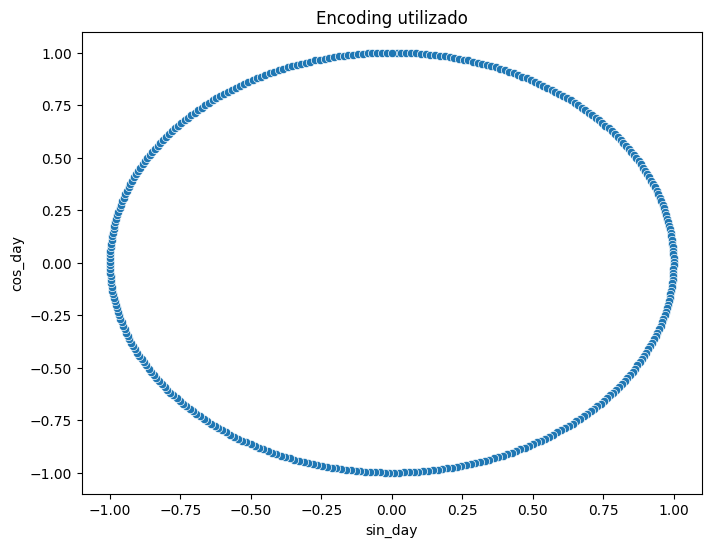

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_day, x="sin_day", y="cos_day").set_title("Encoding utilizado")

plt.show()

`Respuesta`:

**Defina o explique la transformación que aplica cada uno de los siguientes encoding e indique la diferencia entre ellos considerando sklearn** [3 Pts]




*   `One-Hot Encoding`: One-hot encoding es una técnica en la que cada categoría única se convierte en un vector binario, donde una posición está marcada como "1" y las demás como "0". Esto se hace para representar las categorías de manera numérica sin asumir ninguna relación de orden o significado intrínseco entre las categorías. En scikit-learn, se puede usar la clase OneHotEncoder para realizar esta transformación. Cada categoría se convierte en una columna independiente en la matriz resultante.
*   `Ordinal Encoding`: El ordinal encoding asigna un valor numérico a cada categoría única basado en su posición en una secuencia predefinida. A diferencia del one-hot encoding, aquí se asume un orden inherente entre las categorías. Esto es útil cuando las categorías tienen un significado ordinal, como niveles o tamaños. En scikit-learn se puede usar la clase OrdinalEncoder para realizar esta transformación.
*   `Label Encoding`: Label encoding asigna un número único a cada categoría, similar al ordinal encoding. Sin embargo, en el label encoding no necesariamente hay una secuencia ordinal predefinida; las asignaciones se realizan de manera arbitraria. Esto puede llevar a que los algoritmos interpreten una relación de orden errónea entre las categorías. En scikit-learn, no hay una clase específica para el label encoding.

**Aplique las siguientes técnicas de preprocesamiento para cada feature especificado:** [3 Pts]

*   `MinMaxScaler` con rango (0, 1): `CO2(tCO2)`, `NSM`
*   `StandardScaler`: `Lagging_Current_Reactive.Power_kVarh`, `Leading_Current_Reactive_Power_kVarh`, `Lagging_Current_Power_Factor`, `Leading_Current_Power_Factor`
*   `Ordinal Encoding`: `Load_Type`
*   `One-Hot Encoding`: `WeekStatus`
*   `Label Encoding`: `Day_of_week`

Por último separe en `dia`, `mes` y `hora` la columna `date` y aplique la transformación cíclica a las nuevas columnas (con el periodo correspondiente para cada una).

In [ ]:
df_new = df.copy()
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [ ]:
df_new['date'] = pd.to_datetime(df_new['date'], format='%d/%m/%Y %H:%M')

# Extract day, month, and hour components
df_new['day'] = df_new['date'].dt.day
df_new['month'] = df_new['date'].dt.month
df_new['hour'] = df_new['date'].dt.hour

df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,day,month,hour
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1,1,0
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,1,0
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1,1,0
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1,1,1
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,31,12,23
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,31,12,23
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,31,12,23
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,31,12,23


In [ ]:
# Run once

df_newday = preprocess_time(df_new, "day", 30)
df_newday = preprocess_time(df_new, "month", 12)
df_newday = preprocess_time(df_new, "hour", 24)
df_newday

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


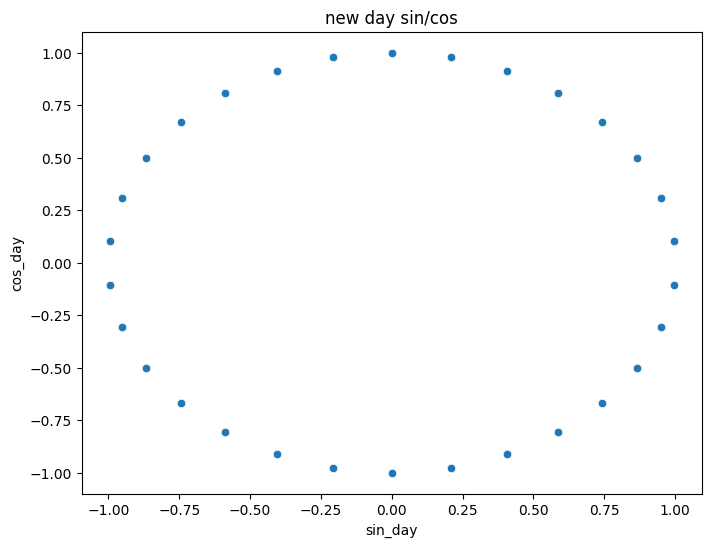

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_newday, x="sin_day", y="cos_day").set_title("new day sin/cos")
plt.show()

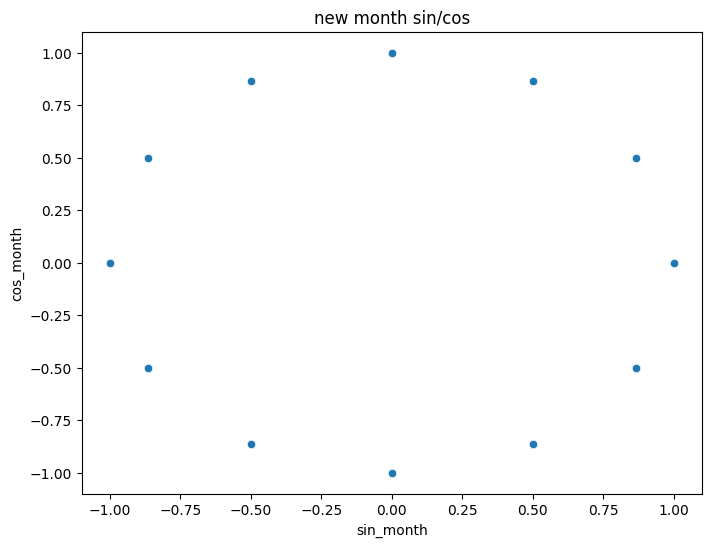

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_newday, x="sin_month", y="cos_month").set_title("new month sin/cos")
plt.show()

### 2.4 Datos a predecir

Una vez teniendo nuestro dataset preprocesado toca crear un modelo de redes neuronales para predecir, para esto vamos a separar nuestro vector de entrada de la columna a predecir

In [ ]:
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# StandardScaler: Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, Lagging_Current_Power_Factor, Leading_Current_Power_Factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['LaggCRP', 'LeadCRP', 'LaggCPF', 'LeadCPF']
scaled_data = scaler.fit_transform(df_new[columns_to_scale])
df_new[columns_to_scale] = scaled_data
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,900,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,1800,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,2700,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,3600,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,4500,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,82800,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,83700,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,84600,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,85500,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# MinMaxScaler con rango (0, 1): CO2(tCO2), NSM
from sklearn.preprocessing import MinMaxScaler

scaler_MinMax = MinMaxScaler()
columns_to_scale = ['CO2','NSM']
scaled_data = scaler_MinMax.fit_transform(df_new[columns_to_scale])
df_new[columns_to_scale] = scaled_data
#df_new[1200:1300]
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,0.010526,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,0.021053,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,0.031579,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,0.042105,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,0.052632,Weekday,Monday,Light_Load,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,0.968421,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,0.978947,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,0.989474,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,1.000000,Weekday,Monday,Light_Load,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# Ordinal Encoding: Load_Type
from sklearn.preprocessing import OrdinalEncoder

encoder_Load = OrdinalEncoder()
columns_to_scale = ['Load']
scaled_dataOrdinal = encoder_Load.fit_transform(df_new[columns_to_scale])
df_new[columns_to_scale] = scaled_dataOrdinal
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,0.010526,Weekday,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,0.021053,Weekday,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,0.031579,Weekday,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,0.042105,Weekday,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,0.052632,Weekday,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,0.968421,Weekday,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,0.978947,Weekday,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,0.989474,Weekday,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,1.000000,Weekday,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# One-Hot Encoding: WeekStatus
from sklearn.preprocessing import OneHotEncoder

encoder_Week = OneHotEncoder(sparse_output=False)
# scaled_data1H = encoder_Week.fit_transform(df_new[columns_to_scale])
scaled_data1H = encoder_Week.fit_transform(df_new[['Week']])
df_new['Week'] = scaled_data1H
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,0.010526,1.0,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,0.021053,1.0,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,0.031579,1.0,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,0.042105,1.0,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,0.052632,1.0,Monday,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,0.968421,1.0,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,0.978947,1.0,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,0.989474,1.0,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,1.000000,1.0,Monday,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# Weekday -> Week (One-Hot Encoding)
# 1: Weekday, 0: Weekend

# Load_type -> Load (Ordinal Encoding)
# Ligh_Load: 0, Medium_Load: 2, Maximum_Load: 1

# Day_of_week -> Day (Label Encoding)

df_new[1295:1300]

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
1295,2018-01-14 12:00:00,8.64,-0.741786,0.036239,0.0,0.995291,0.190836,0.505263,0.0,Sunday,1.0,0.207912,-0.978148,0.5,0.866025,1.224647e-16,-1.000000
1296,2018-01-14 12:15:00,4.57,-0.799434,1.181119,0.0,1.026473,-1.653786,0.515789,0.0,Sunday,2.0,0.207912,-0.978148,0.5,0.866025,1.224647e-16,-1.000000
1297,2018-01-14 12:30:00,5.11,-0.799434,2.630403,0.0,1.026473,-2.069795,0.526316,0.0,Sunday,2.0,0.207912,-0.978148,0.5,0.866025,1.224647e-16,-1.000000
1298,2018-01-14 12:45:00,4.43,-0.799434,1.796661,0.0,1.026473,-1.951592,0.536842,0.0,Sunday,2.0,0.207912,-0.978148,0.5,0.866025,1.224647e-16,-1.000000
1299,2018-01-14 13:00:00,4.46,-0.799434,1.787232,0.0,1.026473,-1.943383,0.547368,0.0,Sunday,2.0,0.207912,-0.978148,0.5,0.866025,-2.588190e-01,-0.965926


In [ ]:
df_new["Week"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35035    1.0
35036    1.0
35037    1.0
35038    1.0
35039    1.0
Name: Week, Length: 35040, dtype: float64

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

#encoder_Day = LabelEncoder()
#scaled_dataDay = encoder_Day.fit_transform(df_new[['Day']])
#df_new[columns_to_scale] = scaled_dataDay
#df_new

label_encoder = LabelEncoder()
label_encoder_data = label_encoder.fit_transform(df_new.Day.values)
df_new["Day"] = label_encoder_data
df_new

,date,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,2018-01-01 00:15:00,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,0.010526,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,2018-01-01 00:30:00,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,0.021053,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,2018-01-01 00:45:00,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,0.031579,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,2018-01-01 01:00:00,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,0.042105,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,2018-01-01 01:15:00,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,0.052632,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,0.968421,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,2018-12-31 23:15:00,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,0.978947,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,2018-12-31 23:30:00,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,0.989474,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,2018-12-31 23:45:00,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,1.000000,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
df_new.Day.values
#df_new.Day.values.shape

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Por orden alfabetico
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_name_mapping

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [ ]:
# se elimina la columna date
del df_new['date']
df_new

,kWh,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
0,3.17,-0.618516,-0.521385,0.0,-0.389410,0.513268,0.010526,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
1,4.00,-0.525911,-0.521385,0.0,-0.729772,0.513268,0.021053,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
2,3.24,-0.598278,-0.521385,0.0,-0.544264,0.513268,0.031579,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.000000,1.000000
3,3.31,-0.581106,-0.521385,0.0,-0.660009,0.513268,0.042105,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
4,3.82,-0.523458,-0.521385,0.0,-0.838117,0.513268,0.052632,1.0,1,0.0,0.207912,0.978148,5.000000e-01,0.866025,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,-0.501380,-0.521385,0.0,-0.976587,0.513268,0.968421,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35036,3.74,-0.570067,-0.521385,0.0,-0.521538,0.513268,0.978947,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35037,3.78,-0.605024,-0.511957,0.0,-0.209188,0.512611,0.989474,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926
35038,3.78,-0.611770,-0.506569,0.0,-0.151052,0.511954,1.000000,1.0,1,0.0,0.207912,0.978148,-2.449294e-16,1.000000,-0.258819,0.965926


In [ ]:
# Separar la columna a predecir "Usage_kWh" y los datos para entrenar
from sklearn.model_selection import train_test_split

df_features = df_new.drop(["kWh"], axis = 1)
df_kWh = df_new["kWh"] # kWh isolated

X_train, X_test, y_train, y_test = train_test_split(df_features, df_kWh, test_size=0.30)

In [ ]:
# df_features: 30040x15
# X_train: 24528x15
# X_test: 10512x15
# y_train: (24528,)
# y_test.shape: (10512,)

X_train

,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
24510,-0.476849,-0.521385,0.000000,-1.273611,0.513268,0.326316,1.0,4,0.0,0.406737,-0.913545,-1.000000e+00,-1.836970e-16,9.659258e-01,-2.588190e-01
11355,-0.570067,-0.521385,0.000000,-1.218646,0.513268,0.294737,0.0,3,0.0,-0.207912,0.978148,8.660254e-01,-5.000000e-01,9.659258e-01,-2.588190e-01
32539,-0.541243,-0.521385,0.000000,-0.618256,0.513268,0.968421,1.0,6,1.0,0.866025,0.500000,-2.449294e-16,1.000000e+00,-2.588190e-01,9.659258e-01
18663,-0.697629,-0.482324,0.285714,1.021716,0.513268,0.421053,0.0,2,2.0,0.207912,-0.978148,-5.000000e-01,-8.660254e-01,5.000000e-01,-8.660254e-01
33094,-0.799434,0.002566,0.142857,1.026473,0.489299,0.747368,1.0,5,1.0,0.743145,-0.669131,-2.449294e-16,1.000000e+00,-9.659258e-01,-2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,-0.799434,2.882277,0.000000,1.026473,-2.040572,0.536842,1.0,1,2.0,-0.866025,0.500000,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
6265,-0.519165,-0.521385,0.000000,-0.927436,0.513268,0.273684,1.0,6,0.0,0.994522,0.104528,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
11284,-0.790848,1.408748,0.142857,1.025944,-0.512471,0.557895,0.0,2,1.0,-0.406737,0.913545,8.660254e-01,-5.000000e-01,-2.588190e-01,-9.659258e-01
860,-0.534497,-0.521385,0.000000,-0.390468,0.513268,0.978947,1.0,5,0.0,0.951057,-0.309017,5.000000e-01,8.660254e-01,-2.588190e-01,9.659258e-01


In [ ]:
X_test

,LaggCRP,LeadCRP,CO2,LaggCPF,LeadCPF,NSM,Week,Day,Load,sin_day,cos_day,sin_month,cos_month,sin_hour,cos_hour
11356,-0.565161,-0.521385,0.000000,-1.077004,0.513268,0.305263,0.0,3,0.0,-0.207912,0.978148,8.660254e-01,-0.500000,9.659258e-01,-2.588190e-01
26543,2.145536,-0.521385,0.428571,-0.111942,0.513268,0.505263,1.0,4,1.0,0.743145,0.669131,-8.660254e-01,0.500000,1.224647e-16,-1.000000e+00
2445,2.858781,-0.521385,0.857143,0.477349,0.513268,0.484211,1.0,0,1.0,-0.743145,0.669131,5.000000e-01,0.866025,2.588190e-01,-9.659258e-01
14649,-0.799434,1.714499,0.000000,1.026473,-2.161730,0.610526,0.0,2,0.0,0.406737,0.913545,1.224647e-16,-1.000000,-5.000000e-01,-8.660254e-01
32699,0.487841,-0.521385,0.428571,0.719407,0.513268,0.631579,1.0,0,2.0,0.994522,0.104528,-2.449294e-16,1.000000,-7.071068e-01,-7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11149,-0.589692,-0.521385,0.000000,-0.734529,0.513268,0.147368,1.0,0,0.0,-0.587785,0.809017,8.660254e-01,-0.500000,7.071068e-01,7.071068e-01
11558,-0.799434,1.752213,0.000000,1.026473,-2.164029,0.410526,1.0,5,0.0,0.207912,0.978148,5.000000e-01,-0.866025,7.071068e-01,-7.071068e-01
27673,-0.413068,-0.521385,0.000000,-1.949577,0.513268,0.273684,1.0,5,0.0,-0.207912,-0.978148,-8.660254e-01,0.500000,1.000000e+00,6.123234e-17
20857,-0.512419,-0.521385,0.000000,-1.699591,0.513268,0.273684,1.0,1,0.0,0.951057,0.309017,-8.660254e-01,-0.500000,1.000000e+00,6.123234e-17


In [ ]:
# check nAn values
has_nan = df_new.isna().any().any()  # or df.isnull().any().any()
print("Are there any NaN values in the DataFrame?", has_nan)

Are there any NaN values in the DataFrame? False


### 2.5 Mi primera Red Neuronal


Ahora procederemos a crear nuestro modelo con Keras, aca queda a libre elección si quieren utilizar la API secuencial o funcional, y tambien queda a libre elección la arquitectura de la red, pruebe con distintas capas, distinto número de neuronas, distintas funciones de activación, regularizadores, etc.

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [ ]:
# Create a neural network
model = tf.keras.models.Sequential()

# Add a hidden layer with units, with ReLU activation
model.add(tf.keras.layers.Dense(256, input_shape=(15,), activation="relu"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="relu"))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 256)               4096      
                                                                 
 dense_137 (Dense)           (None, 256)               65792     
                                                                 
 dense_138 (Dense)           (None, 256)               65792     
                                                                 
 dense_139 (Dense)           (None, 256)               65792     
                                                                 
 dense_140 (Dense)           (None, 1)                 257       
                                                                 
Total params: 201,729
Trainable params: 201,729
Non-trainable params: 0
_________________________________________________________________


**Siendo un problema de regresión, ¿cuántas neuronas en la capa de salida tiene que tener nuestro modelo? y con que activación? [3pts]**

`Respuesta`: Una por cada label (target) y con función de activación lineal (o ReLu) si no se espera un recorrido negativo.

Ahora vamos a compilar y entrenar nuestro modelo, si quiere ponerse más creativo en esta sección puede implementar callbacks, probar distintos optimizadores, batch_size y epochs.

In [ ]:
# definimos algunos hiperparametros
batch_size = 32           # (24528/32)*(1 - val_split) = iterations
epochs = 300               #cantidad de epochs
validation_split = 0.1    #Porcentaje de data destinada a validación
# config
verbose = 2 # 0: none, 1: light, 2: loud

In [ ]:
from keras import backend as K

def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred- y_true)))

#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#loss= 'mean_squared_error'
#metrics=['mean_squared_error']

loss = rmse
metrics=[rmse]

#optimizer= keras.optimizers.SGD(learning_rate=0.001)

# Compile model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

### 2.6 Entrenando el Modelo

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split)

Epoch 1/300
690/690 - 5s - loss: 5.0163 - rmse: 5.0158 - val_loss: 2.6783 - val_rmse: 2.6731 - 5s/epoch - 8ms/step
Epoch 2/300
690/690 - 2s - loss: 2.4024 - rmse: 2.4023 - val_loss: 2.3144 - val_rmse: 2.3112 - 2s/epoch - 3ms/step
Epoch 3/300
690/690 - 2s - loss: 2.1492 - rmse: 2.1494 - val_loss: 1.7948 - val_rmse: 1.7915 - 2s/epoch - 3ms/step
Epoch 4/300
690/690 - 2s - loss: 1.8871 - rmse: 1.8871 - val_loss: 2.0704 - val_rmse: 2.0709 - 2s/epoch - 3ms/step
Epoch 5/300
690/690 - 2s - loss: 1.7434 - rmse: 1.7435 - val_loss: 2.5448 - val_rmse: 2.5435 - 2s/epoch - 3ms/step
Epoch 6/300
690/690 - 2s - loss: 1.6288 - rmse: 1.6287 - val_loss: 1.5861 - val_rmse: 1.5837 - 2s/epoch - 3ms/step
Epoch 7/300
690/690 - 3s - loss: 1.4884 - rmse: 1.4883 - val_loss: 1.7963 - val_rmse: 1.7974 - 3s/epoch - 4ms/step
Epoch 8/300
690/690 - 2s - loss: 1.4575 - rmse: 1.4575 - val_loss: 1.2149 - val_rmse: 1.2128 - 2s/epoch - 3ms/step
Epoch 9/300
690/690 - 2s - loss: 1.4148 - rmse: 1.4149 - val_loss: 1.1193 - val_

AttributeError: ignored

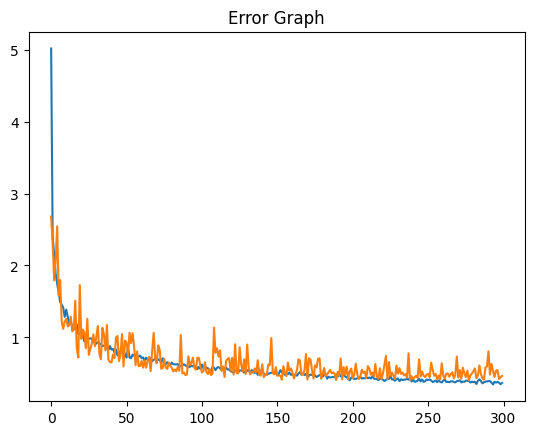

In [ ]:
plot_losses(history, loss)

In [ ]:
# X_train, X_test, y_train, y_test

score = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

329/329 - 1s - loss: 0.5285 - rmse: 0.5279 - 783ms/epoch - 2ms/step
Test loss: 0.528526782989502
Test accuracy: 0.5278764963150024


### 2.7 Exportar y guardar el Modelo

Por último, una vez entrenado nuestro modelo es importante guardarlo, para esto utilizaremos la función `save_model` de keras

In [ ]:
model.save('steel_ind_regression.keras')

Para la entrega de la tarea, el modelo creado tiene que ser subido junto al jupyter notebook completado al github, ya sea en .keras o en un archivo .zip, el modelo será cargado y evaluado para comprobar su correcto funcionamiento, se recomienda probar el guardar y cargar el modelo en el mismo notebook para verificar que no hayan errores.